<a href="https://colab.research.google.com/github/pw0908/Caltech-CS155-2022/blob/main/sets/set1/3_notebook_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [1]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [65]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    return np.sqrt(np.mean((Y-np.dot(X,w))**2))

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    return -2*(y-np.dot(x,w))*x

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    w = w_start
    
    losses = []
    for i in range(N_epochs):
        for j in range(len(Y)):
            grad = gradient(X[j],Y[j],w)
            w -= grad*eta
        losses = np.append(losses,loss(X,Y,w))
        
    return w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [23]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [76]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set1/data/sgd_data.csv')
data = np.array(data)

Y = data[:,4]
X = data[:,0:4]
X = np.append(X,np.ones((len(Y),1)),axis=1)

w,losses = SGD(X,Y,np.ones(5)*0.001,np.exp(-15),800)

print(w)

[ -5.94229011   3.94369494 -11.72402388   8.78549375  -0.22720591]


## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

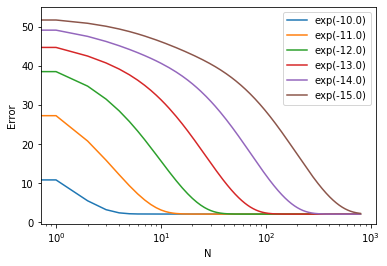

In [77]:
eta = np.exp([-10,-11,-12,-13,-14,-15])
plt.figure()
for i in eta:
    w,losses = SGD(X,Y,np.ones(5)*0.001,i,800)
    plt.semilogx(range(800), losses,label="exp("+str(np.log(i))+")")
plt.legend()
plt.xlabel('N')
plt.ylabel('Error')
plt.savefig("SGD_3G.pdf")
plt.show()

## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [78]:
w1 = np.dot(np.linalg.pinv(X),Y)
print(w1)

[ -5.99157048   4.01509955 -11.93325972   8.99061096  -0.31644251]


In [81]:
np.mean((w1-w)/w1)

0.06967136309976242